<a href="https://colab.research.google.com/github/Manya123-max/Machine-Learning-Algorithms/blob/main/K_MeansClustering1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **K-MEANS CLUSTERING**

IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

IMPORTING DATASET

In [ ]:
data= pd.read_csv('/content/MOBILE PRICE PREDICTION.csv')
print(data)

       Brand              Model Storage    RAM  Screen Size (inches)  \
0      Apple      iPhone 13 Pro   128 GB   6 GB                  6.1   
1    Samsung   Galaxy S21 Ultra   256 GB  12 GB                  6.8   
2    OnePlus              9 Pro   128 GB   8 GB                  6.7   
3     Xiaomi  Redmi Note 10 Pro   128 GB   6 GB                 6.67   
4     Google            Pixel 6   128 GB   8 GB                  6.4   
..       ...                ...      ...    ...                  ...   
402  Samsung   Galaxy Note20 5G      128      8                  6.7   
403   Xiaomi      Mi 10 Lite 5G      128      6                 6.57   
404    Apple  iPhone 12 Pro Max      128      6                  6.7   
405     Oppo              Reno3      128      8                  6.4   
406  Samsung    Galaxy S10 Lite      128      6                  6.7   

            Camera (MP)  Battery Capacity (mAh) Price ($)  
0          12 + 12 + 12                    3095       999  
1    108 + 10 +

ANALYSING THE DATA

In [ ]:
data.head(10)

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799
5,Apple,iPhone 13,128 GB,4 GB,6.1,12 + 12,2815,799
6,Samsung,Galaxy Z Flip3,256 GB,8 GB,6.7,12 + 12,3300,999
7,Xiaomi,Poco X3 Pro,128 GB,6 GB,6.67,48 + 8 + 2 + 2,5160,249
8,Oppo,Reno6 Pro+ 5G,128 GB,8 GB,6.55,50 + 13 + 16 + 2,4500,699
9,Vivo,X70 Pro+,256 GB,12 GB,6.78,50 + 48 + 12 + 8,4500,1199


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


DATA PREPROCESSING

In [ ]:
data.isnull().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

In [ ]:
data.duplicated().sum()

26

In [ ]:
data1=data.drop_duplicates()
print(data1)

       Brand              Model Storage    RAM  Screen Size (inches)  \
0      Apple      iPhone 13 Pro   128 GB   6 GB                  6.1   
1    Samsung   Galaxy S21 Ultra   256 GB  12 GB                  6.8   
2    OnePlus              9 Pro   128 GB   8 GB                  6.7   
3     Xiaomi  Redmi Note 10 Pro   128 GB   6 GB                 6.67   
4     Google            Pixel 6   128 GB   8 GB                  6.4   
..       ...                ...      ...    ...                  ...   
401   Huawei           P30 Lite      128      4                 6.15   
402  Samsung   Galaxy Note20 5G      128      8                  6.7   
403   Xiaomi      Mi 10 Lite 5G      128      6                 6.57   
404    Apple  iPhone 12 Pro Max      128      6                  6.7   
405     Oppo              Reno3      128      8                  6.4   

            Camera (MP)  Battery Capacity (mAh) Price ($)  
0          12 + 12 + 12                    3095       999  
1    108 + 10 +

LABEL ENCODING

In [ ]:
# Assuming df is your DataFrame
# First, identify columns with categorical data
categorical_cols = data1.select_dtypes(include=['object']).columns.tolist()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each categorical column and encode the values
for col in categorical_cols:
    data1[col] = label_encoder.fit_transform(data1[col])

# Now, data contains the encoded values for categorical columns
print(data1)

     Brand  Model  Storage   RAM   Screen Size (inches)  Camera (MP)  \
0        0    232         1    15                     8           15   
1       12    100         4     1                    35            0   
2        9     19         1    18                    31           53   
3       15    178         1    15                    30          119   
4        4    162         1    18                    15           87   
..     ...    ...       ...   ...                   ...          ...   
401      5    155         0    10                     9           69   
402     12     95         0    17                    31           19   
403     15    111         0    14                    26           70   
404      0    229         0    14                    31           17   
405     10    188         0    17                    15           59   

     Battery Capacity (mAh)  Price ($)  
0                      3095         88  
1                      5000         45  
2           

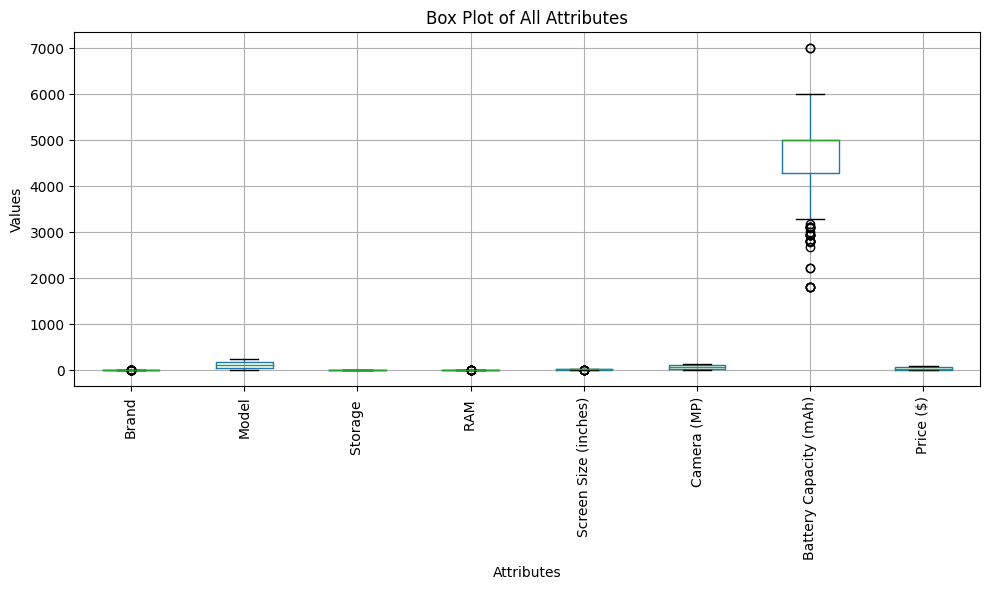

In [ ]:
# Create box plots for all attributes
plt.figure(figsize=(10, 6))  # Set the figure size
data1.boxplot()  # Create box plots for all attributes
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Box Plot of All Attributes')
plt.ylabel('Values')
plt.xlabel('Attributes')
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

In [ ]:
# Handling outliers
def handle_outliers(data1, threshold=3):
    numerical_columns = data1.select_dtypes(include=np.number).columns
    for column in numerical_columns:
        z_scores = np.abs((data1[column] - data1[column].mean()) / data1[column].std())
        data1 = data1[z_scores < threshold]
    return data1

# Call the function to handle outliers
cleaned_data = handle_outliers(data1=data1)
print(cleaned_data)

     Brand  Model  Storage   RAM   Screen Size (inches)  Camera (MP)  \
0        0    232         1    15                     8           15   
1       12    100         4     1                    35            0   
2        9     19         1    18                    31           53   
3       15    178         1    15                    30          119   
4        4    162         1    18                    15           87   
..     ...    ...       ...   ...                   ...          ...   
401      5    155         0    10                     9           69   
402     12     95         0    17                    31           19   
403     15    111         0    14                    26           70   
404      0    229         0    14                    31           17   
405     10    188         0    17                    15           59   

     Battery Capacity (mAh)  Price ($)  
0                      3095         88  
1                      5000         45  
2           

In [ ]:
X =cleaned_data.copy()

In [ ]:
# Select any two features from the dataset
selected_features = ['Screen Size (inches)', 'Camera (MP)']

# Create an array with 100 rows and 2 columns containing the values of the selected features
selected_values = cleaned_data[selected_features].values[:375]

# Check the shape of the array
print(selected_values.shape)

(375, 2)


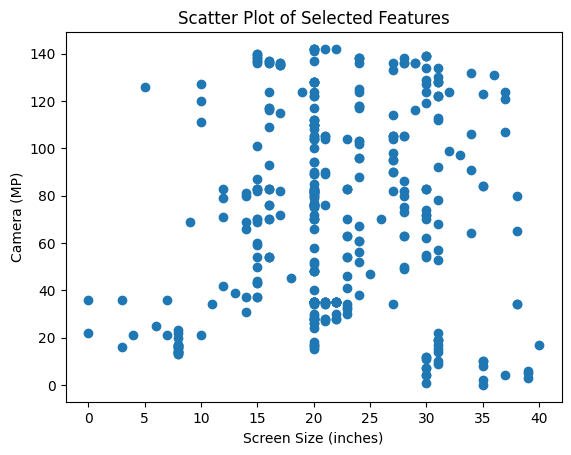

In [ ]:
# Scatter plot for the selected features
plt.scatter(selected_values[:, 0], selected_values[:, 1])
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.title('Scatter Plot of Selected Features')
plt.show()

In [ ]:
# Implement K-means clustering
kmeans_model = KMeans(n_clusters=2)  # Initialize the KMeans model with a chosen value of K
kmeans_model.fit(selected_values)  # Fit the model to the data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

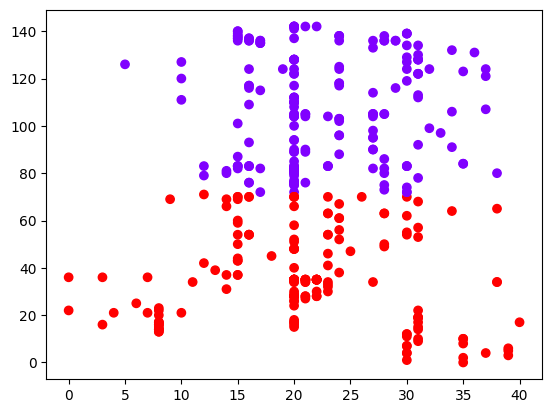

In [ ]:
# Display of Clustering
plt.scatter(selected_values[:,0], selected_values[:,1], c=kmeans_model.labels_, cmap='rainbow', label="points",)
plt.show()

In [ ]:
# To ge the centers of cluster
kmeans_model.cluster_centers_

array([[ 22.71428571, 107.19387755],
       [ 20.83240223,  35.54189944]])

In [ ]:
inertia = kmeans_model.inertia_
print(inertia)

184554.0404742902


In [ ]:
#The Silhouette Coefficient is a measure of the similarity of a point with the points of the same
#cluster, and its dissimilarity with the points of other clusters. (Range between -1 to 1]
silhouette_score = metrics.silhouette_score(X, kmeans_model.labels_)
print(silhouette_score)

0.048536155810603825


## **FINDING K-VALUE CLUSTER FOR TWO FEATURES**

In [ ]:
# Define a range of k values to explore
k_range = range(2, 10) # Adjust the range as needed
print(k_range)

range(2, 10)


In [ ]:
# Lists to score silhouette scores and inertia values
silhouette_scores = []
inertia_values = []

In [ ]:
print("Number of samples in X:", len(X))
for k in k_range:
    if k >= len(X):
        print(f"Skipping k={k} because it's greater than or equal to the number of samples.")
        continue
    # Create a KMeans model with k clusters
    kmeans = KMeans(n_clusters=k, n_init=10)
    # Fit the model to your data
    kmeans.fit(X)
    # Calculate silhouette score
    silhouette_score = metrics.silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_score)
    # Calculate inertia (within-cluster variance)
    inertia = kmeans.inertia_
    inertia_values.append(inertia)
print(silhouette_scores)
print(inertia_values)


Number of samples in X: 375
[0.5923889340202666, 0.6495968234320113, 0.7372269468605491, 0.6968642083848668, 0.7039806606412576, 0.7031530614673571, 0.6924592243569787, 0.5259390355751261]
[80291592.8317361, 39423627.80702563, 12554611.015842648, 7638030.907397229, 5728971.216965707, 4380401.639909182, 3308777.1208770135, 2658027.917277583]


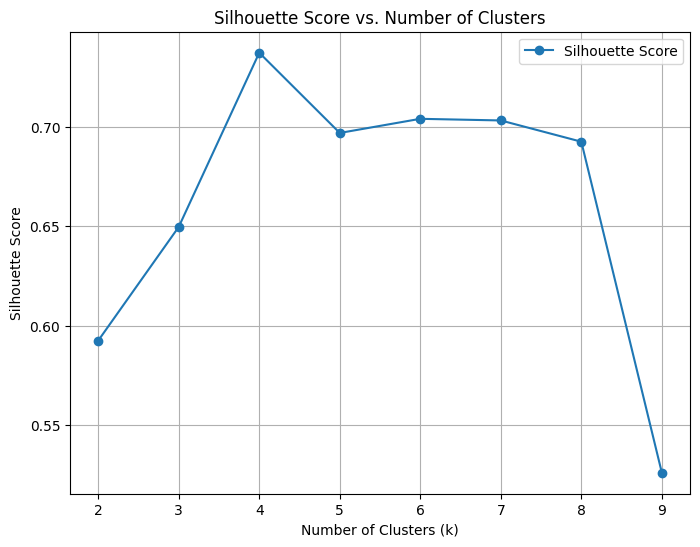

In [ ]:
# Silhouette Plot
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o', label='Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.legend()
plt.grid(True)
plt.show()

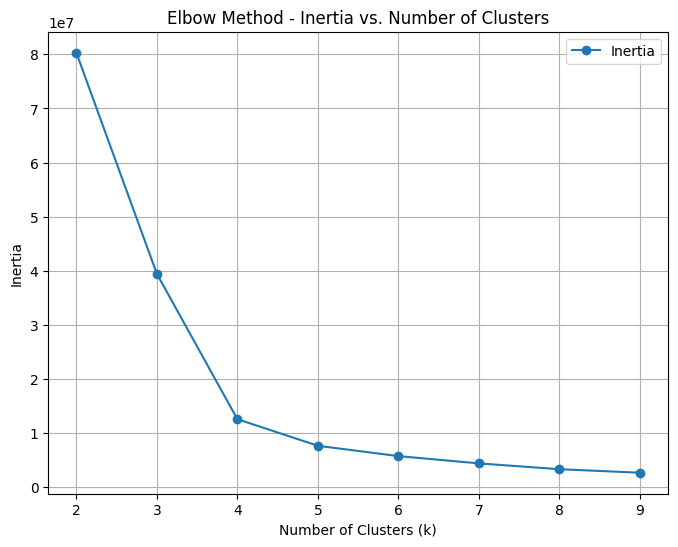

In [ ]:
# Elbow Plot
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia_values, marker='o', label='Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method - Inertia vs. Number of Clusters')
plt.legend()
plt.grid(True)
plt.show()